In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = sns.load_dataset('titanic')

In [7]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
dataset.shape

(891, 15)

In [9]:
df=dataset.loc[:,['survived','pclass','sex','age','who','embark_town','alone']]

In [10]:
df.head()

,survived,pclass,sex,age,who,embark_town,alone
0,0,3,male,22.0,man,Southampton,False
1,1,1,female,38.0,woman,Cherbourg,False
2,1,3,female,26.0,woman,Southampton,True
3,1,1,female,35.0,woman,Southampton,False
4,0,3,male,35.0,man,Southampton,True


In [11]:
#datacleaning
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
who              0
embark_town      2
alone            0
dtype: int64

In [12]:
# dropping all rows with null values
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
who            0
embark_town    0
alone          0
dtype: int64

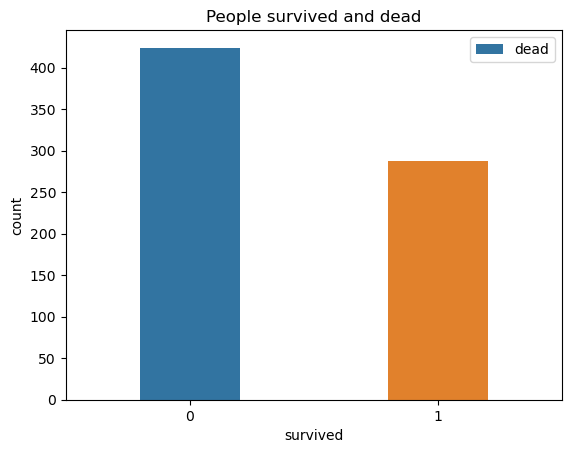

In [16]:
plt.title("People survived and dead")
sns.countplot(x='survived',data=df,width=0.4)
plt.legend(['dead'],loc='upper right')
plt.show()

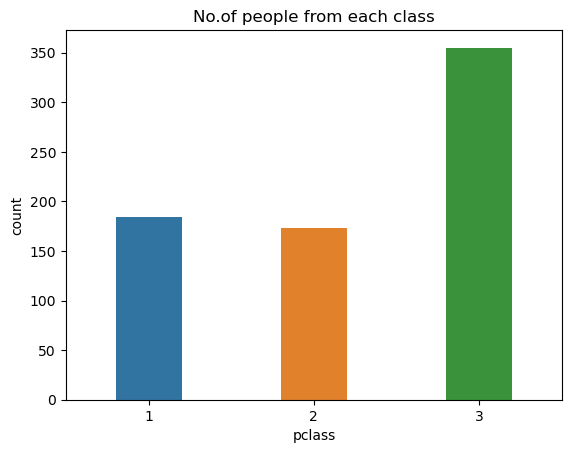

In [20]:
plt.title("No.of people from each class")
sns.countplot(x='pclass',data=df,width=0.4)
plt.show()

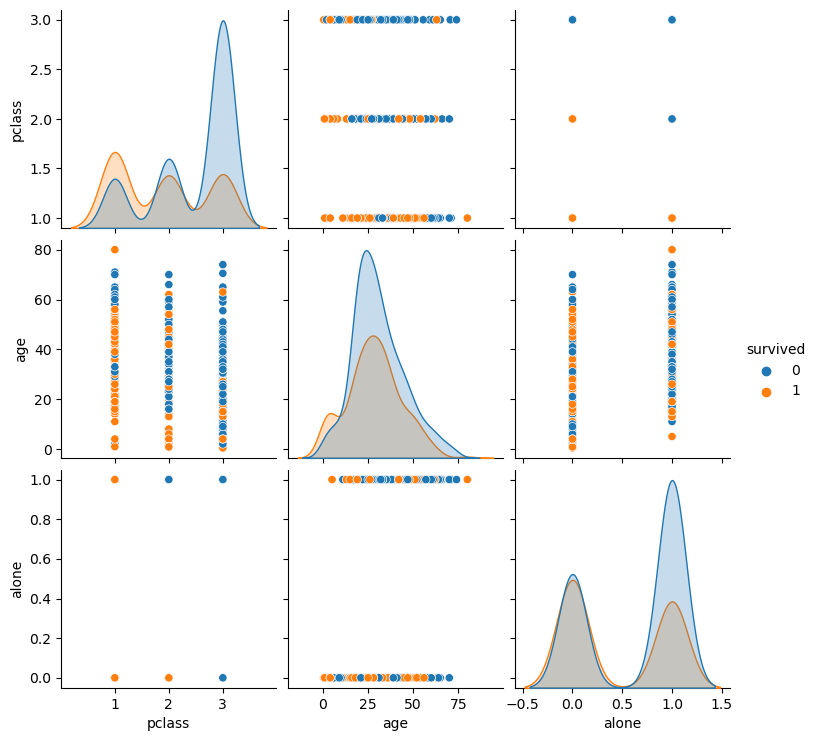

In [22]:
sns.pairplot(data=df,hue='survived')

In [23]:
newdata = df.groupby(['pclass'],as_index=False)['survived'].sum()

In [24]:
newdata

,pclass,survived
0,1,120
1,2,83
2,3,85


<Axes: title={'center': 'No of people survived from each class'}, xlabel='pclass', ylabel='survived'>

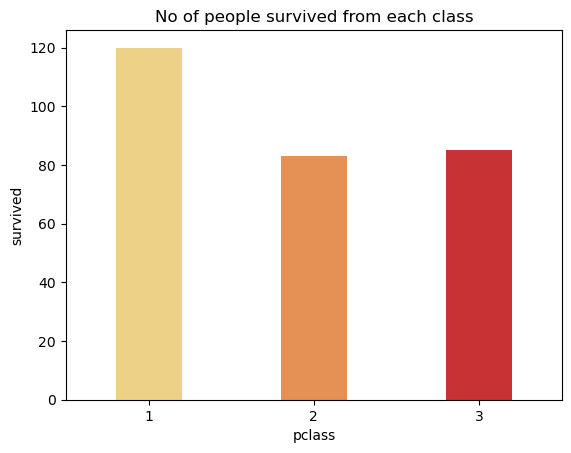

In [25]:
# no of people survived from each class
plt.title("No of people survived from each class")
sns.barplot(x=newdata['pclass'],y=newdata['survived'],data=newdata,palette='YlOrRd',width=0.4)

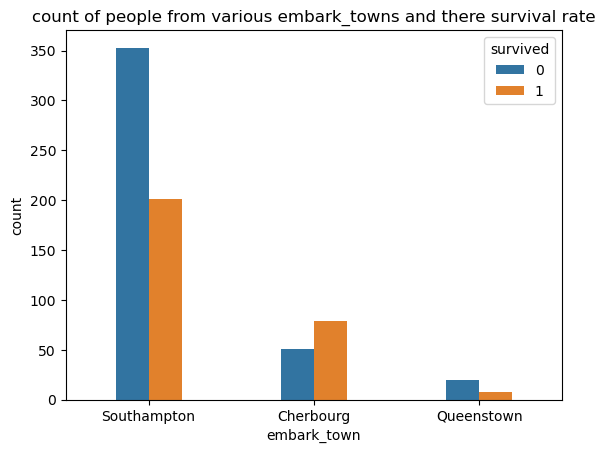

In [27]:
plt.title("count of people from various embark_towns and there survival rate")
sns.countplot(x='embark_town',data=df,width=0.4,hue='survived')
plt.show()

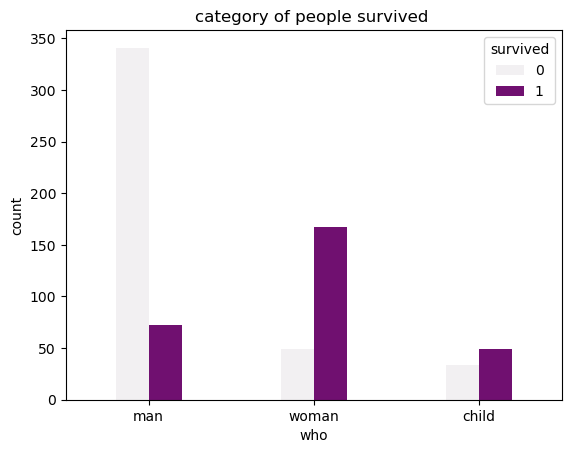

In [33]:
plt.title("category of people survived ")
sns.countplot(x='who',data=df,width=0.4,hue='survived',color='purple')
plt.show()

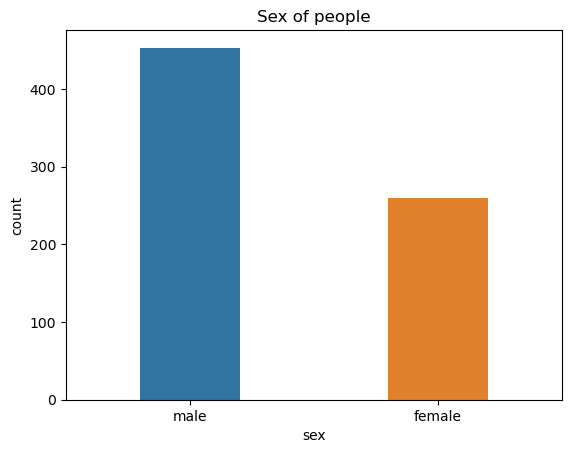

In [32]:
plt.title("Sex of people")
sns.countplot(x='sex',data=df,width=0.4)
plt.show()

In [34]:
newdata = df.groupby(['sex'])['survived'].sum()
newdata

sex
female    195
male       93
Name: survived, dtype: int64

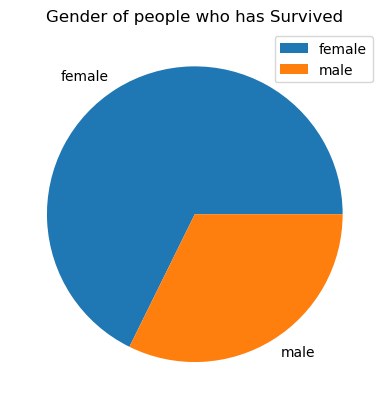

In [36]:
p=[195,93]
mylables = newdata.index
plt.title("Gender of people who has Survived")
plt.pie(p,labels=mylables)
plt.legend()
plt.show()

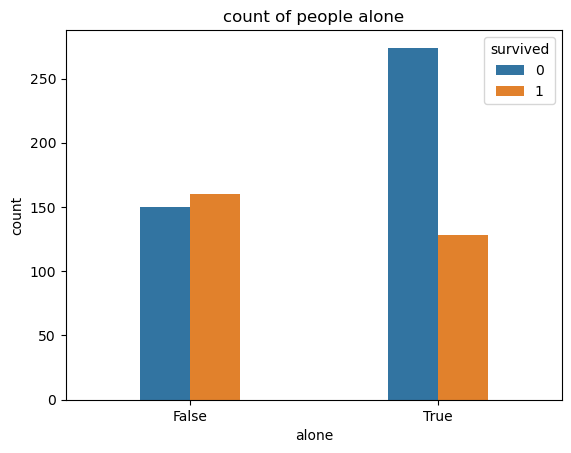

In [37]:
plt.title("count of people alone")
sns.countplot(x='alone',data=df,width=0.4,hue='survived')
plt.show()

In [39]:
df.head()

,survived,pclass,sex,age,who,embark_town,alone
0,0,3,male,22.0,man,Southampton,False
1,1,1,female,38.0,woman,Cherbourg,False
2,1,3,female,26.0,woman,Southampton,True
3,1,1,female,35.0,woman,Southampton,False
4,0,3,male,35.0,man,Southampton,True


In [40]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'who':{'man':0,'woman':1,'child':2}},inplace=True)
df.replace({'embark_town':{'Southampton':0,'Cherbourg':1,'Queenstown':2}},inplace=True)
df.replace({'alone':{'False':0,'True':1}},inplace=True)

In [41]:
df.head()

,survived,pclass,sex,age,who,embark_town,alone
0,0,3,0,22.0,0,0,False
1,1,1,1,38.0,1,1,False
2,1,3,1,26.0,1,0,True
3,1,1,1,35.0,1,0,False
4,0,3,0,35.0,0,0,True


In [43]:
# assigning x and y values
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [44]:
x.head()

,pclass,sex,age,who,embark_town,alone
0,3,0,22.0,0,0,False
1,1,1,38.0,1,1,False
2,3,1,26.0,1,0,True
3,1,1,35.0,1,0,False
4,3,0,35.0,0,0,True


In [45]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#Training data = 80% , Testing data = 20%

In [47]:
x_train.shape

(569, 6)

In [48]:
x_test.shape

(143, 6)

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [50]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
# predicting the output of test data
prediction = clf.predict(x_test)

In [52]:
prediction

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [53]:
y_test

137    0
542    0
651    1
4      0
886    0
      ..
686    0
173    0
862    1
822    0
378    0
Name: survived, Length: 143, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7412587412587412

In [ ]:
#hence our model predicted the survival rate of a person with "74%" accuracy